#Part 1.2

##Librairies to import

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import json
import spacy
nlp = spacy.load('en_core_web_sm')
import re

In [29]:
import pandas as pd

In [30]:
from collections import Counter

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [32]:
from statistics import mean

In [33]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize
from nltk.util import bigrams

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##Data Analysis (text)

In [8]:
with open ("/content/drive/MyDrive/DataScience_Project/text_data.json", "r") as f :
  data = json.load(f)

In [ ]:
data

{'Female_mathematicians': ["Mirka Miller (née Koutova, 9 May 1949 – 2 January 2016) was a Czech-Australian mathematician and computer scientist interested in graph theory and data security. She was a professor of electrical engineering and computer science at the University of Newcastle.\n\n\n== Life ==\nMiller was born on 9 May 1949 in Rumburk, then part of Czechoslovakia, as the oldest in a family of five children. After attempting to escape Czechoslovakia in 1968, stopped because of her companion's illness, she became a student at Charles University before successfully escaping in 1969 and becoming a refugee in Australia.\nMiller earned a bachelor's degree from the University of Sydney in 1976, both in mathematics and computer science,\nand as a student also played volleyball for the New South Wales team and then the Australia women's national volleyball team.\nShe married ornithologist Ben Miller, became a computer programmer working with the Sydney Morning Herald and for NSW Parks

In [11]:
#Some general preprocessing of the texts (removing non-text parts)

def gen_preproc(texts) :
  new_texts = []
  for text in texts :
    new_text = text.split("== References ==")[0]
    new_texts.append(new_text)

  titles = re.compile(r'==+\s.+?\s==+')
  formulas1 = re.compile(r'\{\\displaystyle.+\}')
  formulas2 = re.compile(r'\n {2}\n {4}\n.+?\n {4}\n {2}\n', re.DOTALL)

  for i in range(len(new_texts)) :
    to_remove = titles.findall(new_texts[i])
    for title in to_remove :
      new_texts[i] = new_texts[i].replace(title, "")
    to_remove1 = formulas1.findall(new_texts[i])
    for formula in to_remove1 :
      new_texts[i] = new_texts[i].replace(formula, "")
    to_remove2 = formulas2.findall(new_texts[i])
    for formula in to_remove2 :
      new_texts[i] = new_texts[i].replace(formula, "")
  return new_texts

In [17]:
preproc_texts = {"Female_mathematicians" : gen_preproc(data["Female_mathematicians"]), "Contemporary_artists" : gen_preproc(data["Contemporary_artists"])}
preproc_texts

{'Female_mathematicians': ["Mirka Miller (née Koutova, 9 May 1949 – 2 January 2016) was a Czech-Australian mathematician and computer scientist interested in graph theory and data security. She was a professor of electrical engineering and computer science at the University of Newcastle.\n\n\n\nMiller was born on 9 May 1949 in Rumburk, then part of Czechoslovakia, as the oldest in a family of five children. After attempting to escape Czechoslovakia in 1968, stopped because of her companion's illness, she became a student at Charles University before successfully escaping in 1969 and becoming a refugee in Australia.\nMiller earned a bachelor's degree from the University of Sydney in 1976, both in mathematics and computer science,\nand as a student also played volleyball for the New South Wales team and then the Australia women's national volleyball team.\nShe married ornithologist Ben Miller, became a computer programmer working with the Sydney Morning Herald and for NSW Parks and Wildl

In [18]:
with open("/content/drive/MyDrive/DataScience_Project/preproc_texts.json", "w") as f:
  json.dump(preproc_texts, f)

###Vocabulary

In [20]:
def vocab_preproc(new_texts) :

  #For statistics on the whole text corpus of one category, we put the texts together as one string
  one_string = ""
  for text in new_texts :
    one_string += text

  sp_text = nlp(one_string)

  #Removing stop words and ponctuation
  words = [token for token in sp_text if token.is_stop != True and token.is_punct != True]

  #Lowercasing
  for i in range(len(words)) :
    words[i] = words[i].lower_

  #Removing spaces, numbers and other prominent features that should not be there as words
  for word in words :
    if "\n" in word or word in (' ', '\u200a'):
      words.remove(word)
    try :
      int(word)
      words.remove(word)
    except :
      pass

  return one_string, words

In [22]:
def most_frequent(words):
    occurence_count = Counter(words)
    return occurence_count.most_common(50)

####Female mathematicians

In [55]:
one_string_fm, words = vocab_preproc(preproc_texts["Female_mathematicians"])

In [24]:
len(words)

29364

In [23]:
print(most_frequent(words))

[('university', 518), ('mathematics', 450), ('professor', 190), ('research', 165), ('mathematical', 157), ('theory', 148), ('\n', 141), ('work', 138), ('college', 121), ('mathematician', 112), ('school', 106), ('science', 104), ('women', 101), ('american', 100), ('time', 91), ('germain', 87), ('institute', 80), ('born', 78), ('society', 77), ('department', 76), ('sciences', 71), ('degree', 70), ('de', 66), ('equations', 64), ('dent', 64), (' ', 64), ('association', 63), ('theorem', 63), ('new', 62), ('published', 60), ('year', 60), ('problem', 59), ('education', 59), ('function', 58), ('years', 57), ('systems', 57), ('\n\n\n\n', 57), ('computer', 56), ('earned', 56), ('dissertation', 55), ('later', 54), ('woman', 53), ('ergodic', 53), ('fellow', 52), ('died', 51), ('equation', 51), ('applied', 50), ('engineering', 49), ('student', 49), ('moved', 49)]


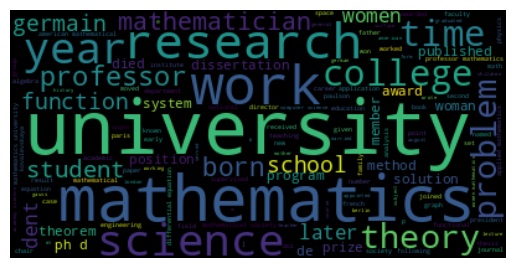

In [25]:
one_string2 = ""
for word in words :
  one_string2 += " "+word

wordcloud = WordCloud().generate(one_string2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

####Contemporary artists

In [36]:
#Just because one text was over the length limit originally set at 1000000
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 1200000

In [56]:
one_string_ca, words = vocab_preproc(preproc_texts["Contemporary_artists"])

In [38]:
len(words)

102883

In [39]:
print(most_frequent(words))

[('art', 1893), ('museum', 984), ('work', 892), ('new', 851), ('\n', 682), ('works', 590), ('york', 576), ('artist', 539), ('gallery', 501), ('exhibition', 451), ('arts', 339), ('university', 304), ('artists', 302), ('de', 288), ('contemporary', 284), ('painting', 278), ('london', 277), ('film', 273), ('time', 270), ('paintings', 259), ('ai', 241), ('series', 233), ('sculpture', 233), ('including', 223), ('modern', 205), ('american', 204), ('city', 202), ('installation', 197), ('born', 186), ('school', 180), ('early', 176), ('paris', 176), ('world', 175), ('video', 174), ('created', 173), ('isbn', 173), ('began', 165), ('body', 158), ('center', 158), ('vostell', 156), ('life', 154), ('national', 150), ('award', 149), ('los', 144), ('years', 143), ('ruscha', 143), ('collection', 141), ('later', 140), ('angeles', 140), ('solo', 139)]


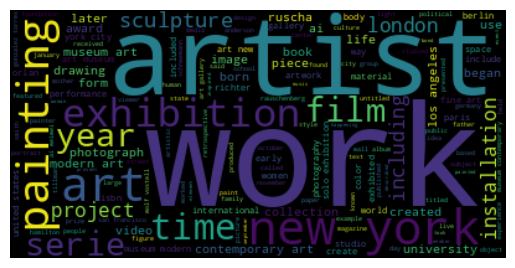

In [40]:
one_string2 = ""
for word in words :
  one_string2 += " "+word

wordcloud = WordCloud().generate(one_string2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

###Sentences

In [42]:
#Counting the number of sentences per text

sent_count = [[],[]]
category = ["Female_mathematicians", "Contemporary_artists"]
for i in range(len(category)) :
  for text in preproc_texts[category[i]] :
    sp_sents = nlp(text)
    count = 0
    for sentence in sp_sents.sents :
      count += 1
    sent_count[i].append(count)

sent_count

[[21,
  74,
  28,
  9,
  13,
  5,
  14,
  103,
  38,
  13,
  7,
  10,
  11,
  16,
  26,
  15,
  17,
  4,
  8,
  44,
  12,
  10,
  8,
  9,
  34,
  9,
  3,
  31,
  7,
  15,
  9,
  19,
  22,
  13,
  16,
  17,
  7,
  9,
  41,
  22,
  19,
  27,
  206,
  20,
  12,
  26,
  16,
  7,
  19,
  17,
  125,
  7,
  8,
  8,
  107,
  9,
  16,
  14,
  35,
  5,
  24,
  63,
  40,
  158,
  7,
  74,
  57,
  14,
  22,
  14,
  32,
  13,
  32,
  14,
  9,
  10,
  48,
  43,
  10,
  27,
  6,
  10,
  19,
  11,
  10,
  19,
  6,
  25,
  50,
  8,
  36,
  7,
  10,
  10,
  8,
  23,
  38,
  19,
  22,
  8],
 [77,
  22,
  368,
  22,
  79,
  252,
  10,
  3,
  296,
  206,
  96,
  38,
  112,
  270,
  9,
  82,
  83,
  77,
  25,
  49,
  88,
  18,
  14,
  65,
  55,
  15,
  97,
  26,
  56,
  28,
  29,
  99,
  137,
  48,
  172,
  129,
  15,
  42,
  170,
  37,
  74,
  44,
  53,
  133,
  243,
  18,
  5,
  33,
  199,
  34,
  30,
  61,
  117,
  186,
  217,
  71,
  139,
  53,
  34,
  21,
  12,
  13,
  40,
  82,
  16,
  119,
  107,
  4

In [44]:
sent_df = pd.DataFrame({"FM_texts" : preproc_texts['Female_mathematicians'], "Sentence_count_FM" : sent_count[0],
                        "CA_texts" : preproc_texts['Contemporary_artists'], "Sentence_count_CA" : sent_count[1]})
sent_df

,FM_texts,Sentence_count_FM,CA_texts,Sentence_count_CA
0,"Mirka Miller (née Koutova, 9 May 1949 – 2 Janu...",21,"Allan Kaprow (August 23, 1927 – April 5, 2006)...",77
1,"Irmgard Flügge-Lotz, née Lotz (16 July 1903 – ...",74,"Slobodan ""Braco"" Dimitrijević (born 18 June 19...",22
2,"Lai-Sang Lily Young (Chinese: 楊麗笙, born 1952) ...",28,Félix González-Torres or Felix Gonzalez-Torres...,368
3,Holly Krieger is a professor in mathematics at...,9,"Tomasz Urbanowicz (born 1959 in Wrocław, Polan...",22
4,Lia Bronsard (b. 14 March 1963) is a Canadian ...,13,"Gilbert Prousch, sometimes referred to as Gilb...",79
...,...,...,...,...
95,"Julia Kempe is a French, German, and Israeli r...",23,"Keith Sonnier (July 31, 1941 – July 18, 2020) ...",20
96,"Rachel Blodgett Adams (October 13, 1894–Januar...",38,"Kiki Smith (born January 18, 1954) is a German...",80
97,Elisa Maria Eugenia Cibrario Cinquini (6 Septe...,19,"Hans Haacke (born August 12, 1936) is a German...",85
98,"Artishia Garcia Wilkerson Jordan (August 12, 1...",22,"Bruno Fonseca (1958 – May 31, 1994) was an Ame...",24


In [46]:
print("""Female mathematicians:
Sentences min: %s,
Sentences max: %s,
Sentences average: %s
""" %(min(sent_count[0]), max(sent_count[0]), mean(sent_count[0])))

print("""Contemporary artists:
Sentences min: %s,
Sentences max: %s,
Sentences average: %s
""" %(min(sent_count[1]), max(sent_count[1]), mean(sent_count[1])))

Female mathematicians:
Sentences min: 3,
Sentences max: 206,
Sentences average: 25.48

Contemporary artists:
Sentences min: 3,
Sentences max: 489,
Sentences average: 81.06



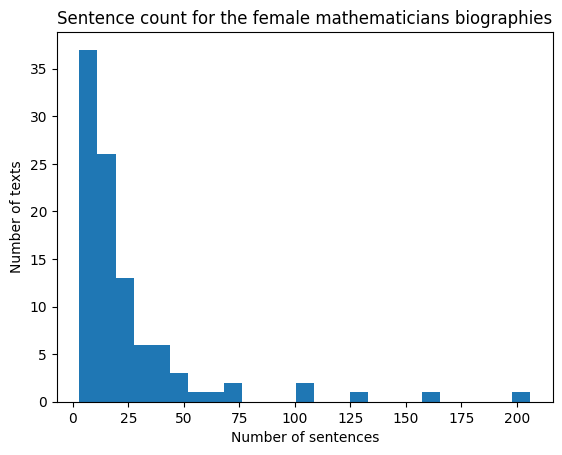

In [47]:
plt.hist(sent_count[0], bins=25)
plt.title("Sentence count for the female mathematicians biographies")
plt.xlabel("Number of sentences")
plt.ylabel("Number of texts")
plt.show()

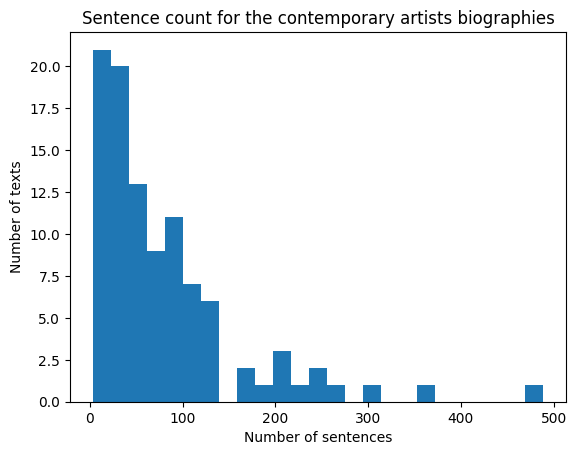

In [48]:
plt.hist(sent_count[1], bins=25)
plt.title("Sentence count for the contemporary artists biographies")
plt.xlabel("Number of sentences")
plt.ylabel("Number of texts")
plt.show()

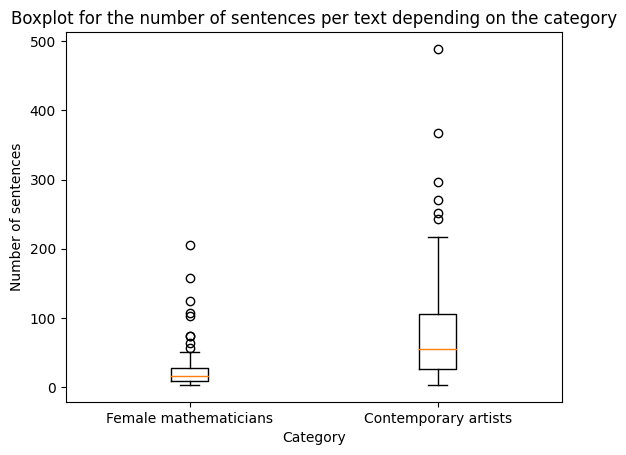

In [54]:
plt.boxplot(sent_count, labels=["Female mathematicians", "Contemporary artists"])
plt.title("Boxplot for the number of sentences per text depending on the category")
plt.xlabel("Category")
plt.ylabel("Number of sentences")
plt.show()

###Tokens

In [58]:
sentences = [nltk.sent_tokenize(one_string_fm), nltk.sent_tokenize(one_string_ca)]

In [59]:
#Counting the number of bigrams per sentence per category
#GARDE-T-ON LA PONCTUATION POUR CETTE ANALYSE DES BIGRAMS ?

bigram_count = [[], []]
for i in range(len(category)) :
  for sentence in sentences[i] :
    tokens = nltk.word_tokenize(sentence)
    bigrams_list = list(nltk.bigrams(tokens))
    bigram_count[i].append(len(bigrams_list))

bigram_count

[[28,
  15,
  24,
  34,
  43,
  34,
  38,
  13,
  13,
  30,
  38,
  16,
  8,
  16,
  9,
  34,
  65,
  53,
  22,
  45,
  9,
  21,
  39,
  28,
  11,
  25,
  16,
  40,
  27,
  18,
  22,
  11,
  18,
  18,
  14,
  22,
  24,
  26,
  31,
  22,
  31,
  29,
  20,
  30,
  18,
  36,
  54,
  35,
  18,
  34,
  19,
  20,
  28,
  16,
  33,
  16,
  42,
  36,
  21,
  27,
  49,
  36,
  30,
  25,
  19,
  12,
  11,
  51,
  23,
  17,
  29,
  24,
  33,
  22,
  26,
  35,
  29,
  25,
  11,
  32,
  26,
  27,
  38,
  9,
  35,
  30,
  20,
  15,
  53,
  7,
  5,
  2,
  74,
  21,
  30,
  29,
  34,
  39,
  10,
  14,
  38,
  13,
  17,
  26,
  28,
  23,
  13,
  27,
  17,
  38,
  1,
  18,
  7,
  9,
  34,
  37,
  42,
  32,
  44,
  19,
  21,
  24,
  16,
  15,
  31,
  26,
  35,
  25,
  64,
  39,
  4,
  17,
  9,
  17,
  16,
  5,
  32,
  24,
  10,
  9,
  14,
  201,
  8,
  11,
  15,
  8,
  25,
  21,
  12,
  39,
  29,
  17,
  28,
  56,
  25,
  35,
  46,
  11,
  45,
  32,
  18,
  26,
  54,
  22,
  42,
  17,
  46,
  29,
  9,
  

In [66]:
bigrams_fm_df = pd.DataFrame({"FM_sentences" : sentences[0], "Bigram_count_fm" : bigram_count[0]})
bigrams_fm_df

,FM_sentences,Bigram_count_fm
0,"Mirka Miller (née Koutova, 9 May 1949 – 2 Janu...",28
1,She was a professor of electrical engineering ...,15
2,"Miller was born on 9 May 1949 in Rumburk, then...",24
3,After attempting to escape Czechoslovakia in 1...,34
4,Miller earned a bachelor's degree from the Uni...,43
...,...,...
2568,"Her doctoral dissertation, Entropy Numbers and...",30
2569,"In 2018, she was given a chair for function sp...",24
2570,Haroske is the author of the book Envelopes an...,21
2571,With Hans Triebel she also wrote Distributions...,25


In [67]:
bigrams_ca_df = pd.DataFrame({"CA_sentences" : sentences[1], "Bigram_count_ca" : bigram_count[1]})
bigrams_ca_df

,CA_sentences,Bigram_count_ca
0,"Allan Kaprow (August 23, 1927 – April 5, 2006)...",26
1,"He helped to develop the ""Environment"" and ""Ha...",24
2,His Happenings — some 200 of them — evolved ov...,12
3,Eventually Kaprow shifted his practice into wh...,37
4,"Fluxus, performance art, and installation art ...",17
...,...,...
7781,"So this is where Artaud, the Cinema of Transgr...",21
7782,The cinematic exploration of spirituality and ...,50
7783,The articles also broaden the aim of the movem...,40
7784,"Frank's Wild Years, 1994/1995\nI Wonder, 1996\...",30


In [68]:
print("""Female mathematicians:
Bigram count per sentence min: %s,
Bigram count per sentence max: %s,
Bigram count per sentence average: %s,
Total bigram number: %s
""" %(min(bigram_count[0]), max(bigram_count[0]), mean(bigram_count[0]), sum(bigram_count[0])))

print("""Contemporary artists:
Bigram count per sentence min: %s,
Bigram count per sentence max: %s,
Bigram count per sentence average: %s,
Total bigram number: %s
""" %(min(bigram_count[1]), max(bigram_count[1]), mean(bigram_count[1]), sum(bigram_count[1])))

Female mathematicians:
Bigram count per sentence min: 1,
Bigram count per sentence max: 266,
Bigram count per sentence average: 22.950641274776526,
Total bigram number: 59052

Contemporary artists:
Bigram count per sentence min: 0,
Bigram count per sentence max: 942,
Bigram count per sentence average: 25.772797328538402,
Total bigram number: 200667



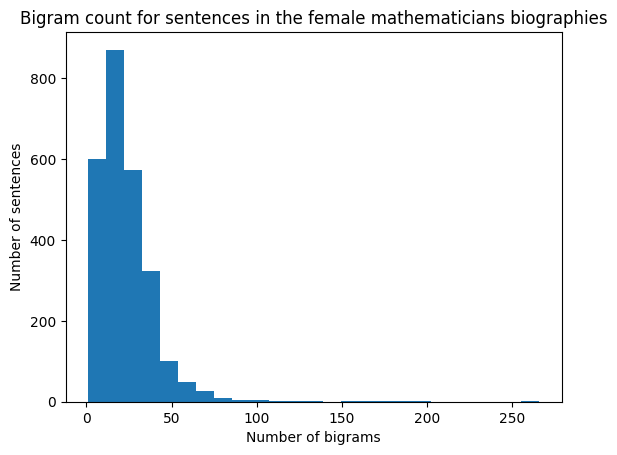

In [69]:
plt.hist(bigram_count[0], bins=25)
plt.title("Bigram count for sentences in the female mathematicians biographies")
plt.xlabel("Number of bigrams")
plt.ylabel("Number of sentences")
plt.show()

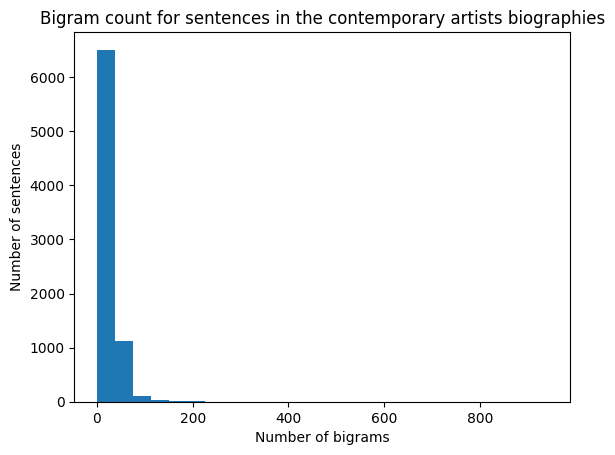

In [70]:
plt.hist(bigram_count[1], bins=25)
plt.title("Bigram count for sentences in the contemporary artists biographies")
plt.xlabel("Number of bigrams")
plt.ylabel("Number of sentences")
plt.show()

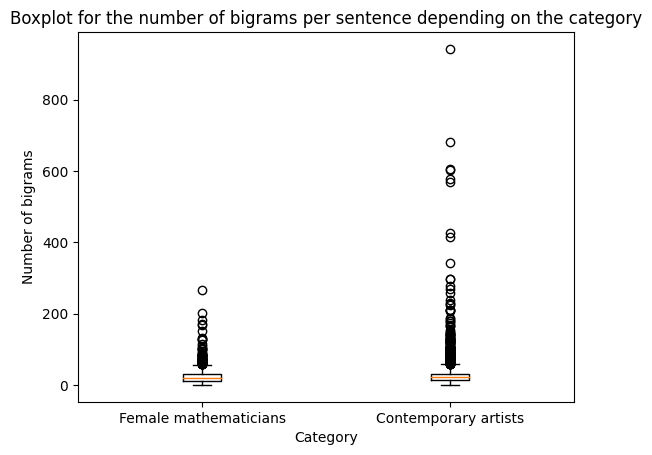

In [71]:
plt.boxplot(bigram_count, labels=["Female mathematicians", "Contemporary artists"])
plt.title("Boxplot for the number of bigrams per sentence depending on the category")
plt.xlabel("Category")
plt.ylabel("Number of bigrams")
plt.show()